<a href="https://colab.research.google.com/github/shu-nya/Bike-Sharing-Demand/blob/master/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##Import the libraries

In [1]:
# Import necessary libraries

import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##Import the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Project datasets/SeoulBikeData.csv', encoding='unicode_escape')

##Understanding the data

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.shape

(8760, 14)

In [6]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

##Observations:

1. The dataset contains 8760 rows and 14 columns. 

2. Each row of the dataset contains information about weather conditions and the date, time and count of the rented bikes.

In [7]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


##Observations:

1. The ranges of values in the numerical columns seem to be reasonable. Hence, much data cleaning may not be required. 

2. The data in the columns "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" seems to be significantly skewed. This is because the median (50 percentile) is much lower than the maximum value.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##Observations:

1. Date is object datatype. It has to be converted to datetime.

2. Separate Day, Month and Year.

3. Create encoding for the Weekday.

In [9]:
data.Date = pd.to_datetime(data.Date)

In [10]:
data['Day'] = data['Date'].dt.day

In [11]:
data['Month'] = data.Date.dt.month

In [12]:
data['Year'] = data['Date'].dt.year

In [13]:
data['Weekday'] = data.Date.dt.day_name()

In [14]:
map_Weekday = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data['Weekday_Encoding'] = data.Weekday.map(map_Weekday)

##Observations:

1. Drop the Date column as all the necessary information has been extracted.

In [15]:
data.drop(columns = 'Date', inplace = True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int64

In [17]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday,Weekday_Encoding
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,4


##Check for Missing values

In [18]:
data.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
Weekday                      0
Weekday_Encoding             0
dtype: int64

##Observations:

1. There are no missing values.

##Check for Duplicate Entries.

In [19]:
len(data[data.duplicated()])

0

##Observations:

1. There are no duplicate entries.

##Separate the Numerical and Categorical Features.

###Numerical Features.

1. If the datatype of a feature is not object, then the feature is numerical.

In [20]:
num_features= [col for col in data.columns if data[col].dtype != 'object']
num_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year',
 'Weekday_Encoding']

##Plot the numerical features to analyse the data distribution.

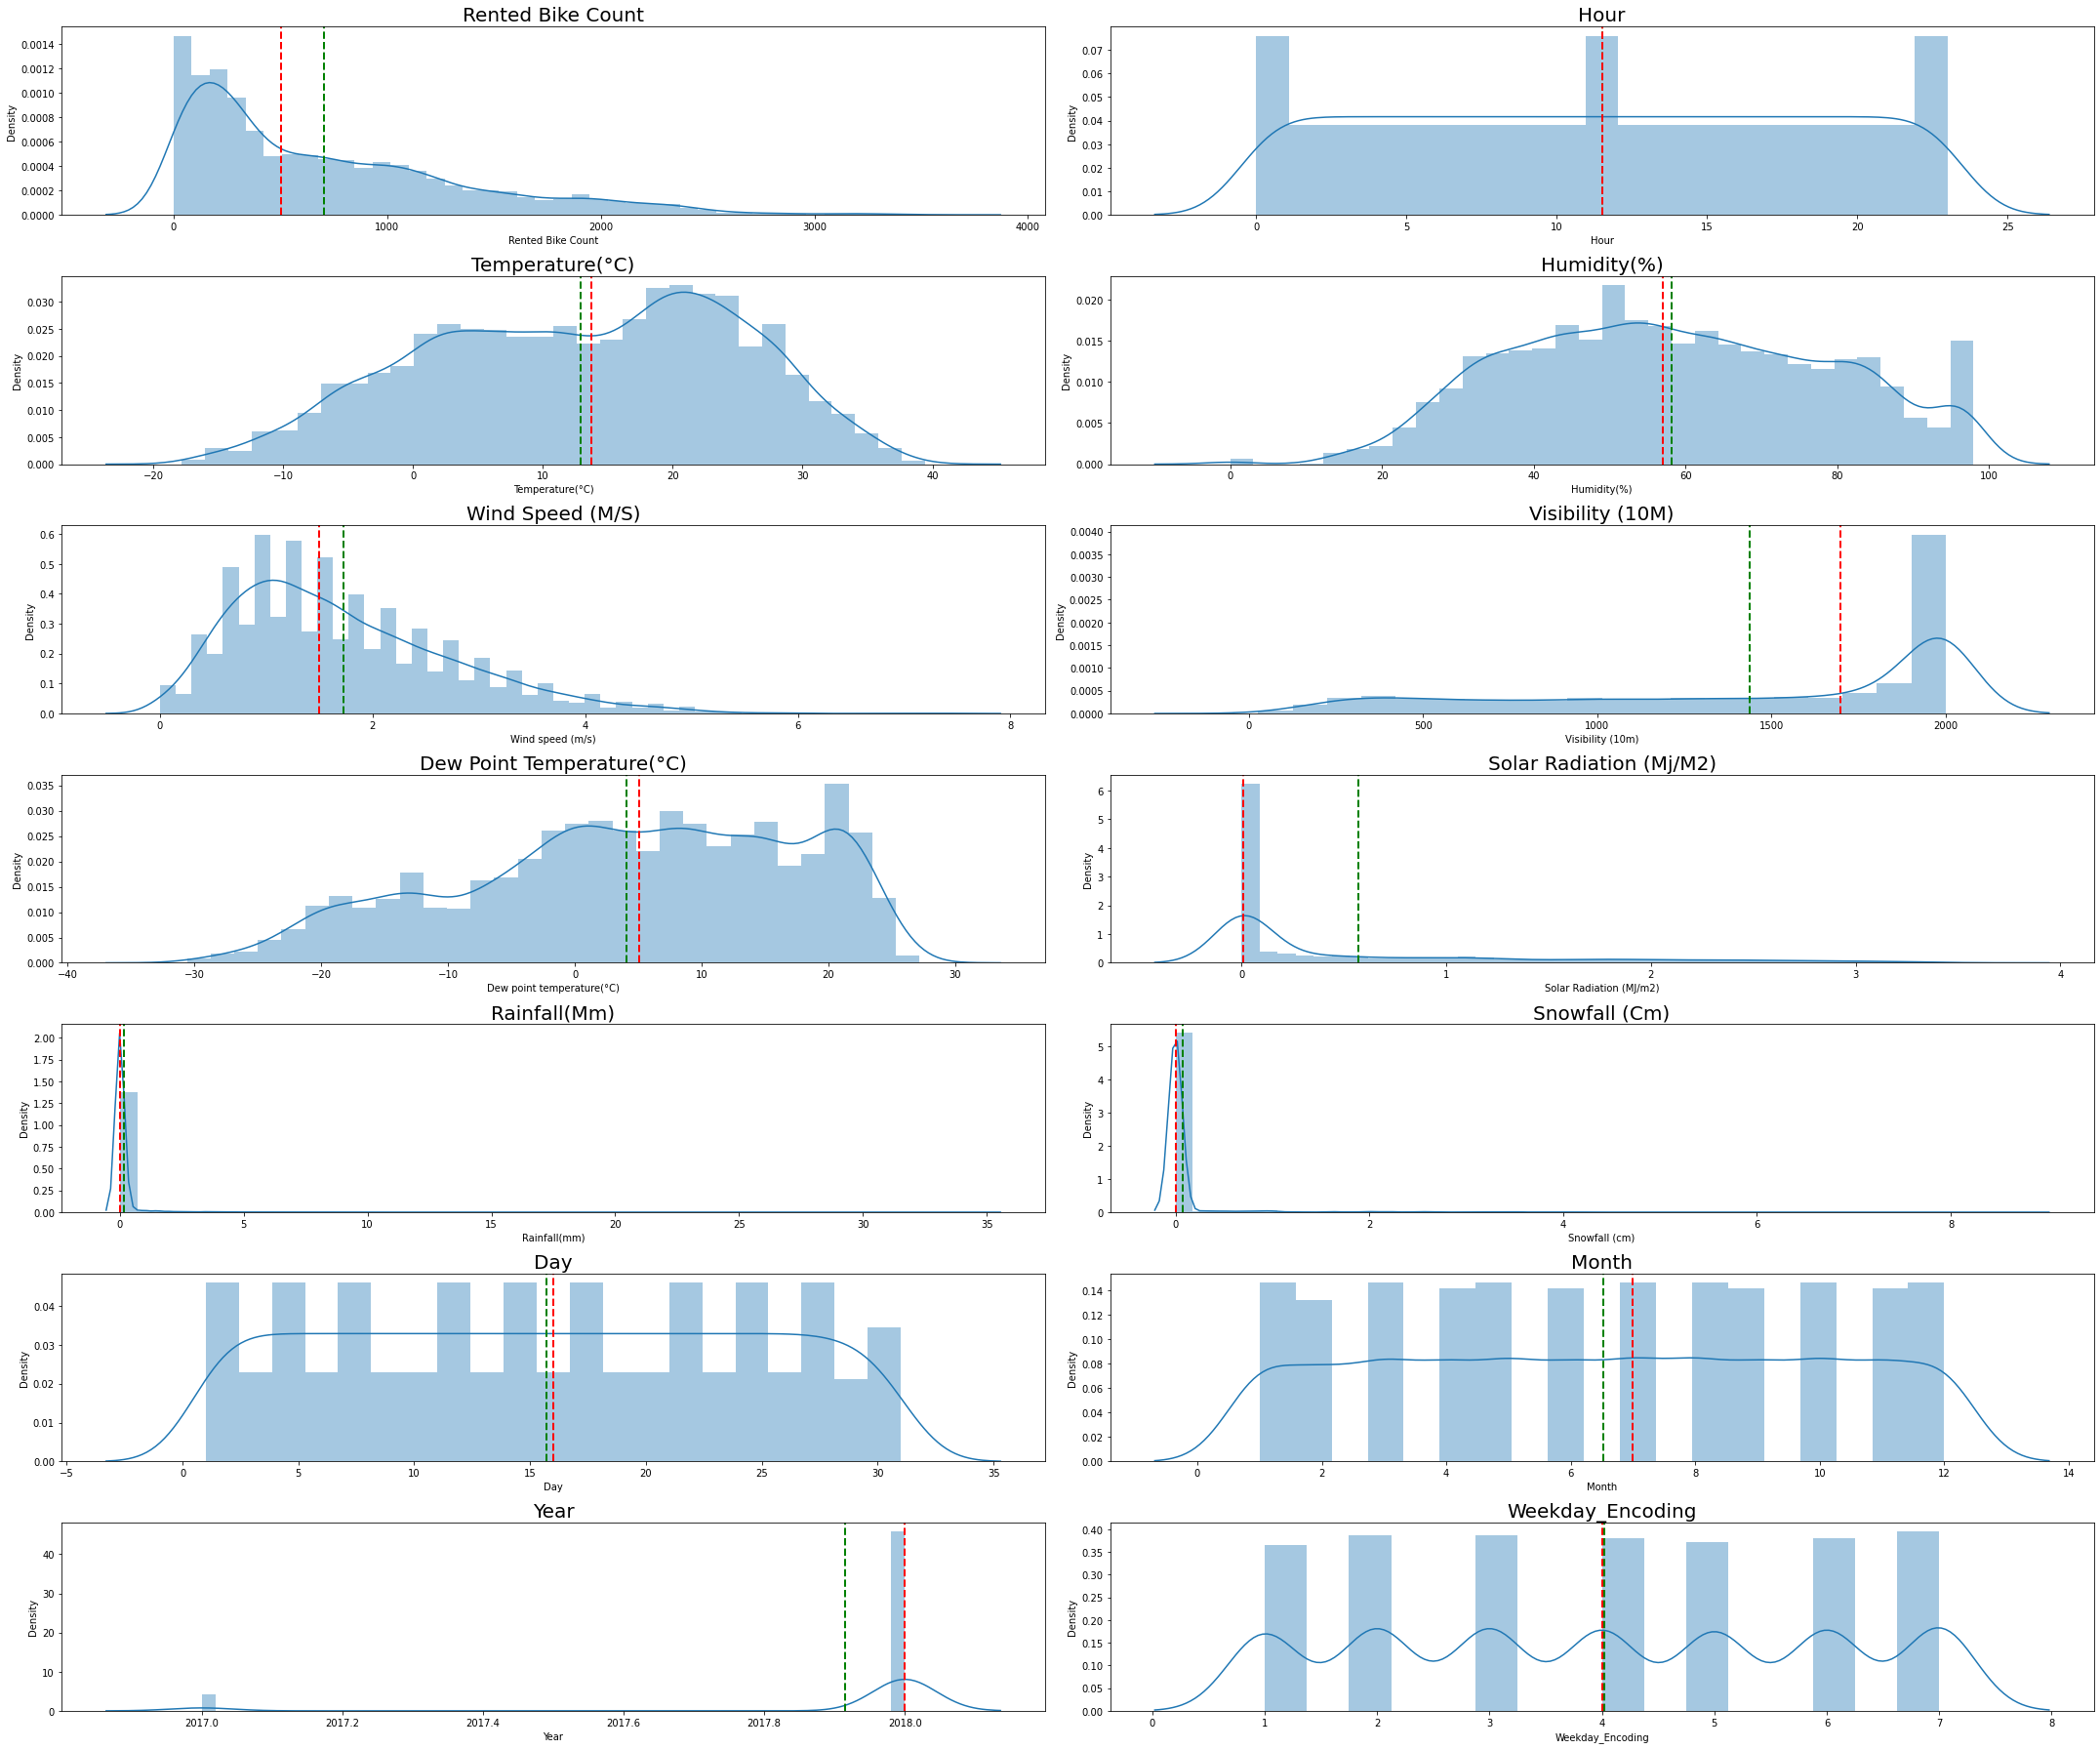

In [21]:
fig = plt.figure(figsize = (30,25))
for index,column in enumerate(num_features):
  plt.subplot(7,2,index+1)
  sns.distplot(data[column])
  feature = data[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='Green', linestyle='dashed', linewidth=2)  #Green Color indicate mean of data
  ax.axvline(feature.median(), color='Red', linestyle='dashed', linewidth=2) #Red indicate median of data
  plt.title(f'{column.title()}', size=20)
  plt.tight_layout()

In [22]:
data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Rented Bike Count,1.153428,0.853387
Hour,0.000000,-1.204176
Temperature(°C),-0.198326,-0.837786
Humidity(%),0.059579,-0.803559
Wind speed (m/s),0.890955,0.727179
Visibility (10m),-0.701786,-0.961980
Dew point temperature(°C),-0.367298,-0.755430
Solar Radiation (MJ/m2),1.504040,1.126433
Rainfall(mm),14.533232,284.991099
Snowfall (cm),8.440801,93.803324


##Observations:

1. Right/Positive Skewed Distribution: 

Mode < Median < Mean: 

[Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)]

2. No Skew: 

Mean = Median = Mode: 

[Hour, Temperature, Humidity(%), Rainfall(mm), Snowfall(cm)]

3. Left/Negative Skewed Distribution: 

Mean < Median < Mode:

[Visibility(10m)]

###Plot histograms to analyse the discrete features distribution

Discrete Variables Count: 5


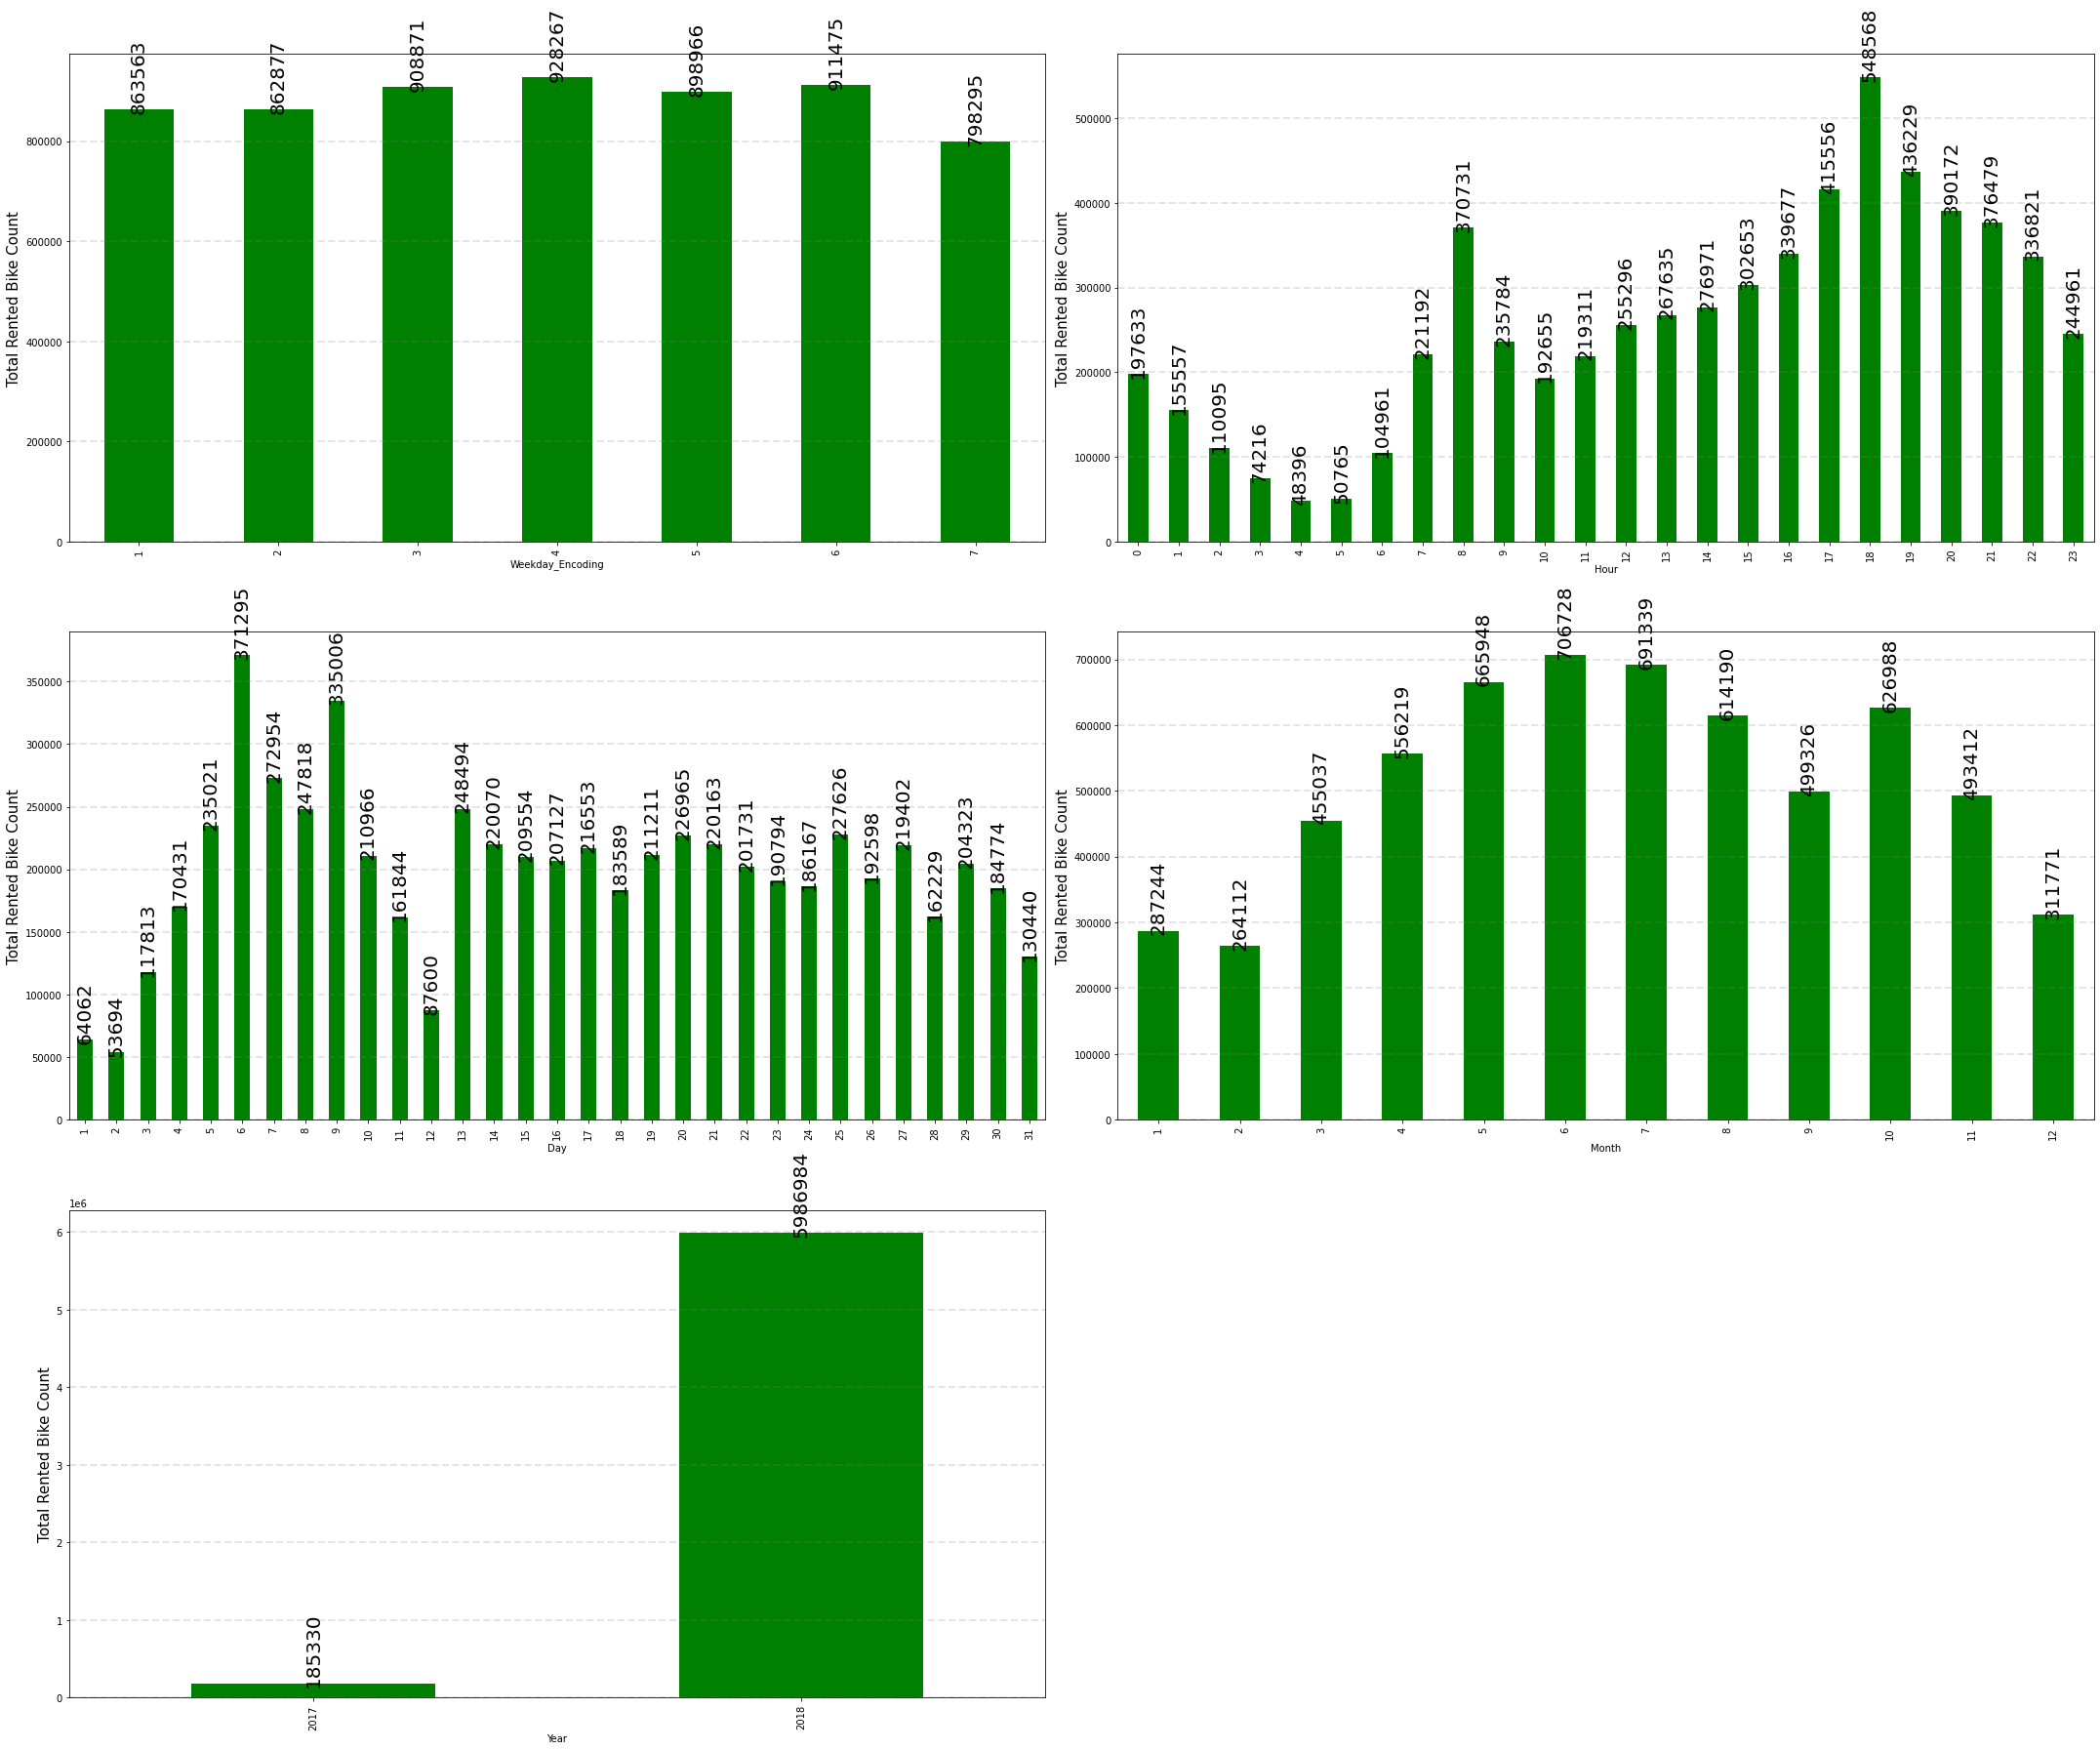

In [23]:
num_discrete_value=[feature for feature in num_features if len(data[feature].unique())<32]
print("Discrete Variables Count: {}".format(len(num_discrete_value)))

fig = plt.figure(figsize = (30,25))
for index,column in enumerate(num_discrete_value) :
  plt.subplot(3,2,index+1)
  dataset=data.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="Green") #kind=bar used for plotting barchart
  feature = data[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count', size=15)
  plt.tight_layout()
  plt.grid(color='Grey', linestyle='dashed', linewidth=2, axis='y', alpha=0.2)
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20, rotation=90)

###Categorical Features

1. The features whose datatype is object are the categorical variables.

In [24]:
categ_features=[col for col in data.columns if data[col].dtype == 'object']
categ_features

['Seasons', 'Holiday', 'Functioning Day', 'Weekday']

In [25]:
for feature in categ_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2
The feature is Functioning Day and number of categories are 2
The feature is Weekday and number of categories are 7


In [26]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [27]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


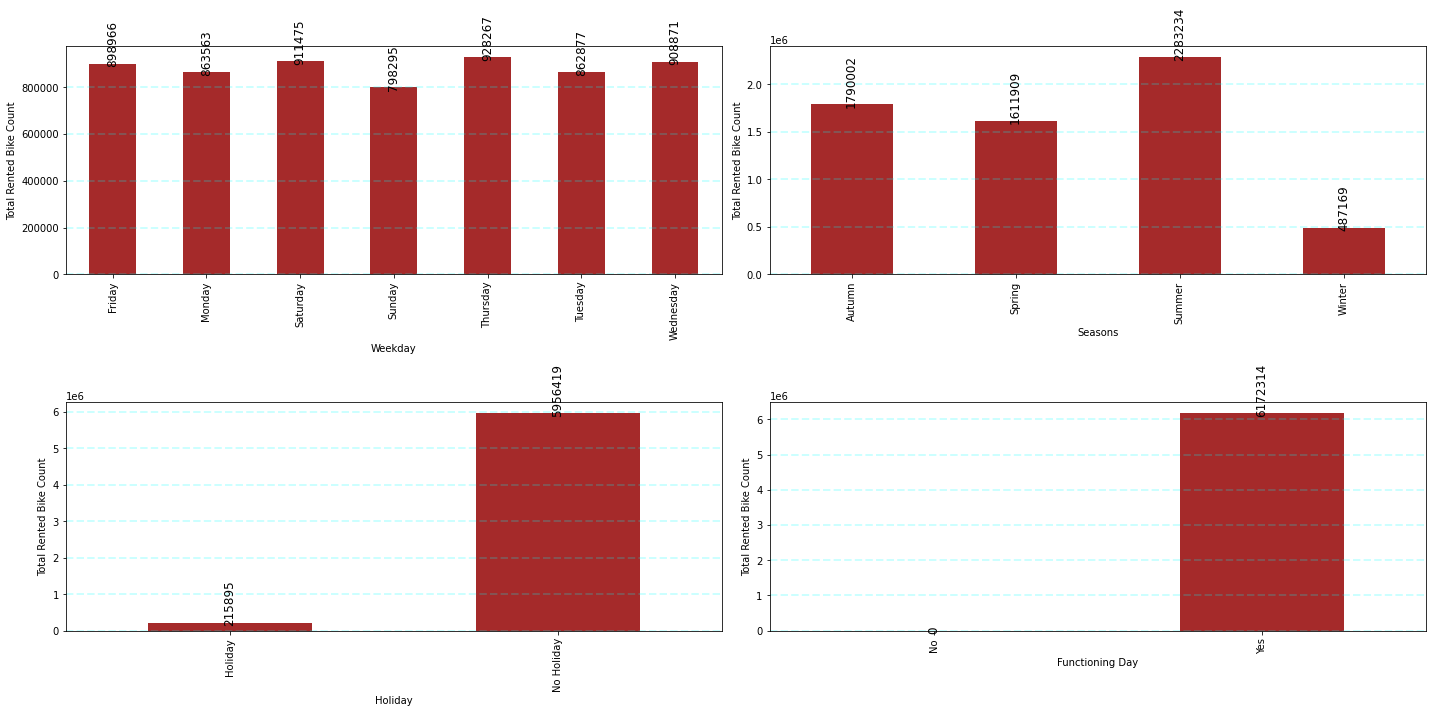

In [28]:
#Find out the relationship between categorical variable and dependent feature Rented Bike Count

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(categ_features) :
    plt.subplot(2,2,index+1)
    dataset=data.copy()
    dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="Brown")
    feature = data[column]
    ax = fig.gca()
    plt.ylabel('Total Rented Bike Count')
    plt.tight_layout()
    plt.grid(color='Cyan', linestyle='--', linewidth=2, axis='y', alpha=0.2)
    for p in ax.patches:
        ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)

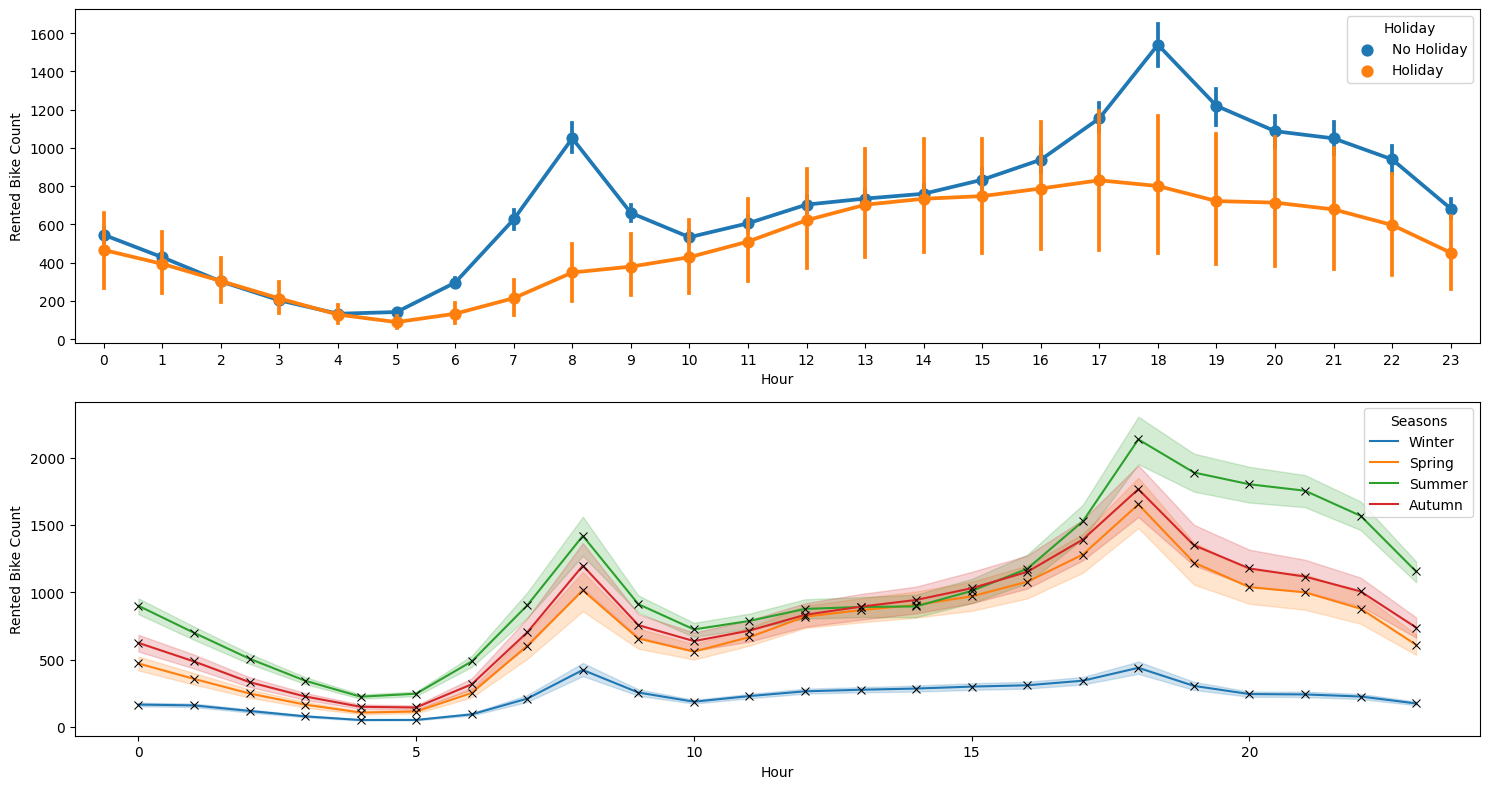

In [29]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[0], 
              hue="Holiday")
sns.lineplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

##Feature Engineering on the Data

1. Encode categorical data into one-hot vectors.

2. Identify the Inputs and Target.

3. Scale values in numeric columns to a $(0,1)$ range.

4. Split the dataset into training and validation sets.

###Encode the data.

1. oh_df : OneHotEncoder Data

2. le_df : LabelEncoder Data


Encode the categorical data and check the accuracy of encoders.

In [30]:
# Check Seasons column Data

data.groupby('Seasons').count()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Weekday,Weekday_Encoding
Seasons,,,,,,,,,,,,,,,,,
Autumn,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
Spring,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Summer,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Winter,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


In [31]:
# Encode labels of multiple columns at ones using LabelEncoder

from sklearn.preprocessing import  LabelEncoder

le_data = data.apply(LabelEncoder().fit_transform)
le_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday,Weekday_Encoding
0,253,0,111,28,22,1788,114,0,0,0,3,1,1,11,0,0,4,3
1,203,1,108,29,8,1788,114,0,0,0,3,1,1,11,0,0,4,3
2,172,2,103,30,10,1788,113,0,0,0,3,1,1,11,0,0,4,3
3,106,3,101,31,9,1788,114,0,0,0,3,1,1,11,0,0,4,3
4,77,4,103,27,23,1788,104,0,0,0,3,1,1,11,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,991,19,205,25,26,1682,187,0,0,0,0,1,1,29,10,1,0,4
8756,755,20,197,28,23,1788,191,0,0,0,0,1,1,29,10,1,0,4
8757,686,21,189,30,3,1756,191,0,0,0,0,1,1,29,10,1,0,4
8758,704,22,184,32,10,1648,192,0,0,0,0,1,1,29,10,1,0,4


In [32]:
le_data.groupby('Seasons').count()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Weekday,Weekday_Encoding
Seasons,,,,,,,,,,,,,,,,,
0,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
1,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
2,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
3,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


##Checking for Outliers in the Distributions

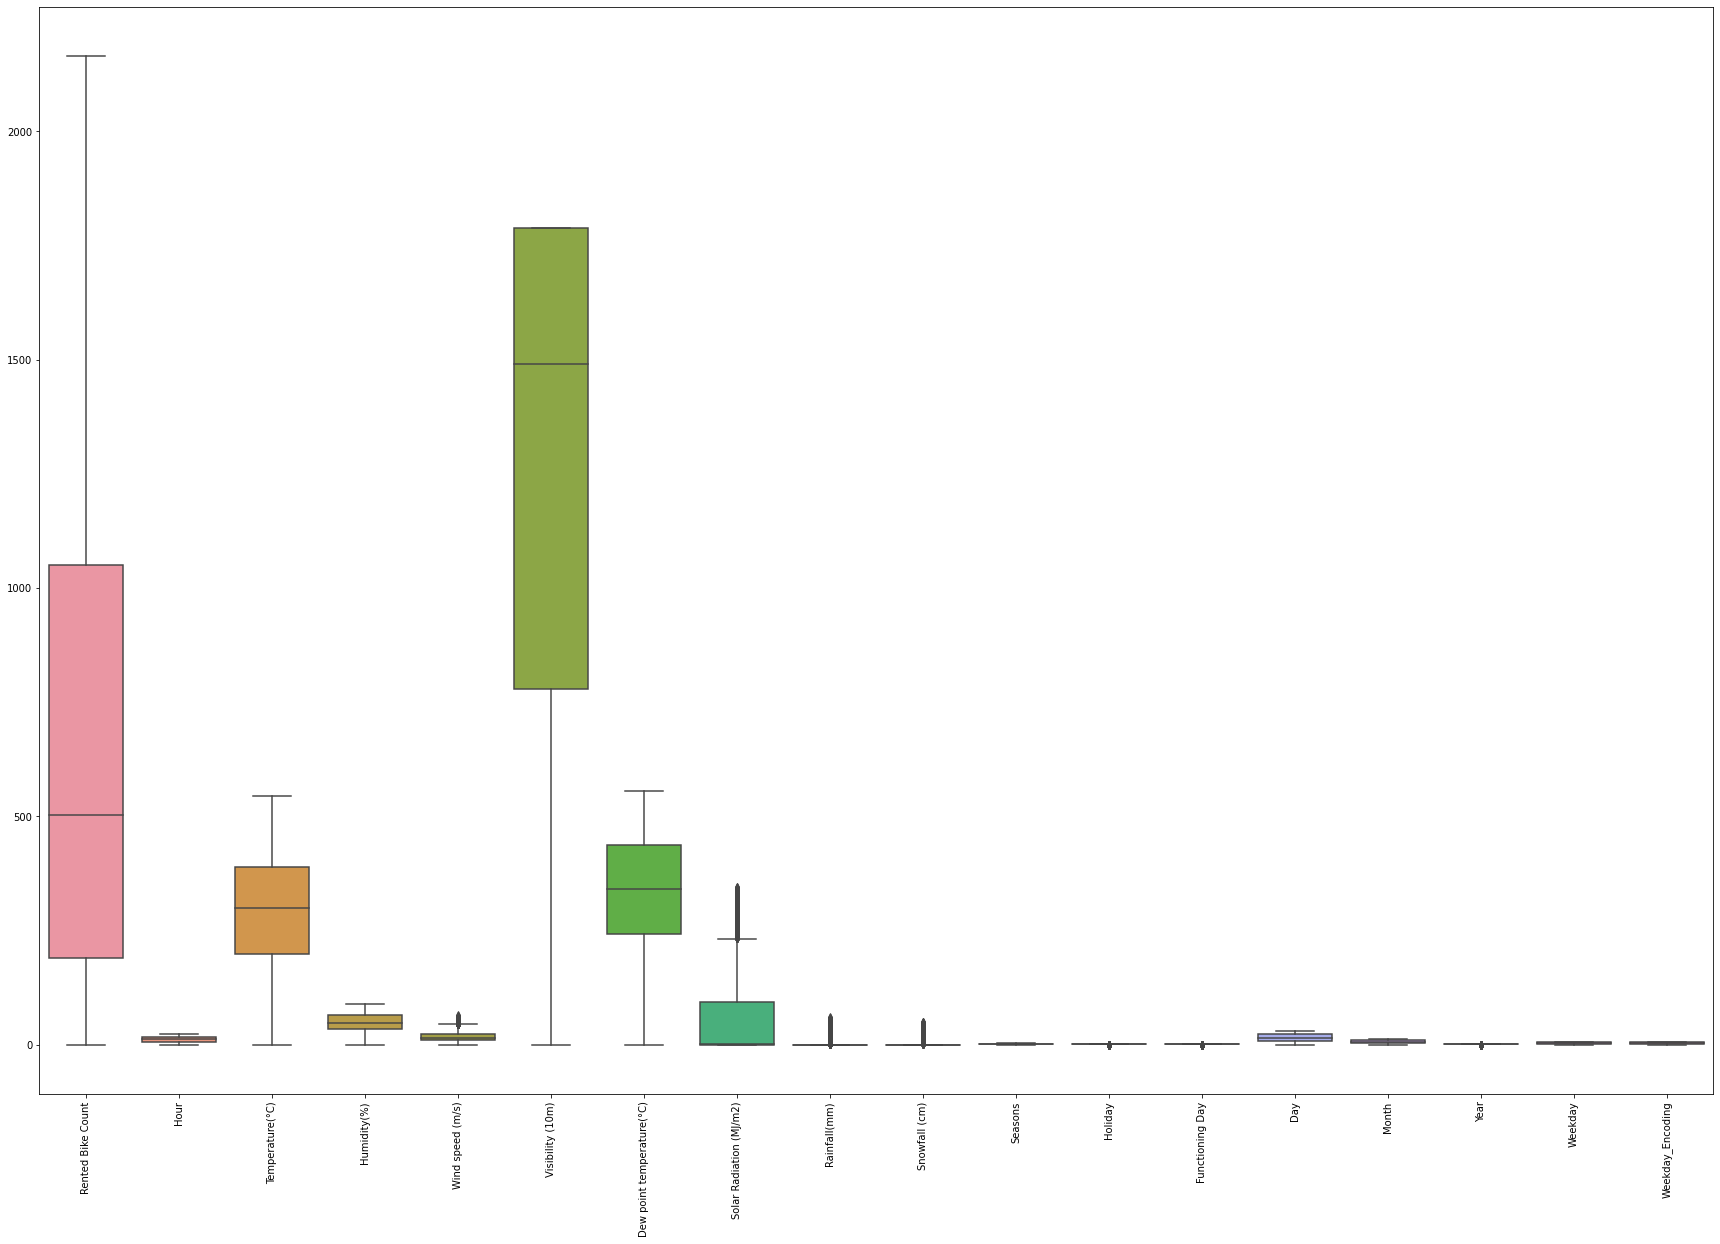

In [33]:
#checking for outliers
plt.figure(figsize=(30,20))   # for define chart size
plt.xticks(rotation = 90)     # plot X-axis ticks in 90 degree rotation for clear visibility
sns.boxplot(data = le_data)   # box plot of le_df data frame raw data
plt.show()

The Target Parameter is Rented Bike Count.

Analysing its Distribution.

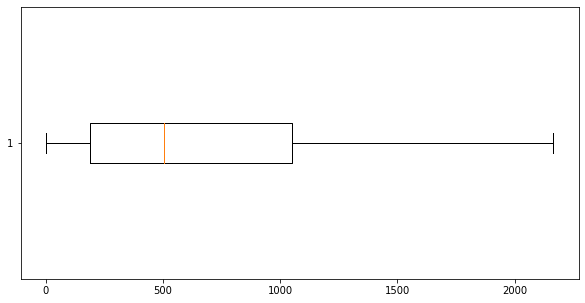

In [34]:
plt.figure(figsize=(10,5))
plt.boxplot(le_data['Rented Bike Count'],vert=False)
plt.show()

Outlier detection using Interquartile Range

Square Root The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.

Square Root Transformation: Transform the values from y to √y.

Log Transformation The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for reducing right skewness. Worth noting, however, is that it can not be applied to zero or negative values.

Log Transformation: Transform the values from y to log(y).

Cube root transformation involves converting x to x^ (1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data

Cube Root Transformation: Transform the values from y to y^(1/3).

Text(0.5, 1.0, 'cube root')

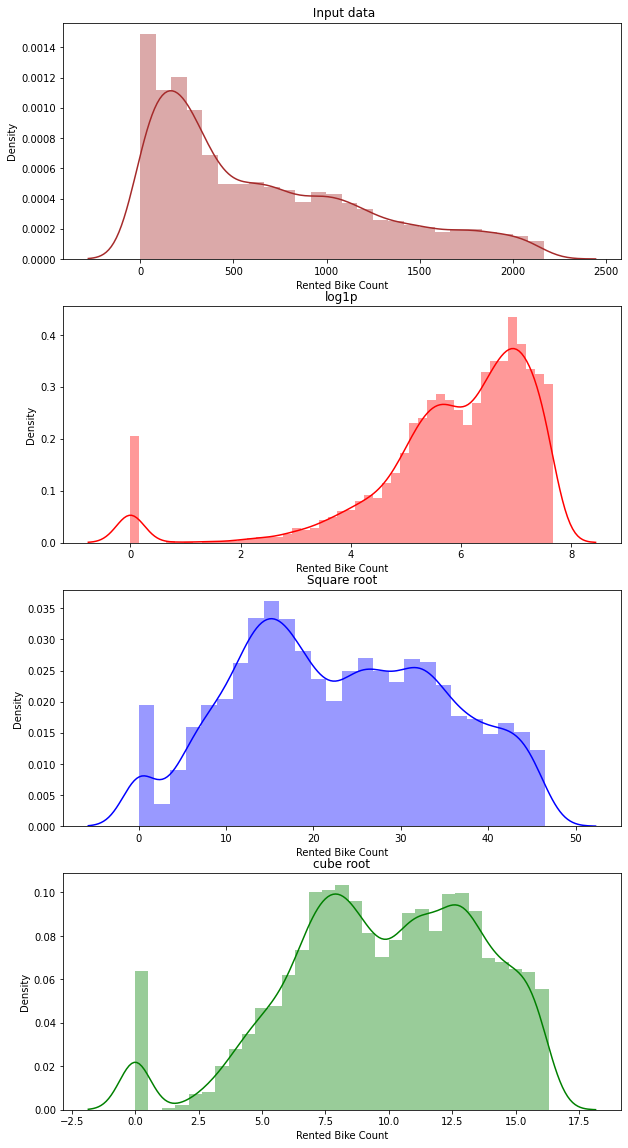

In [35]:
# apply different tranformation techniques and check data distribution

fig,axes = plt.subplots(4,1,figsize=(10,20))
sns.distplot((le_data['Rented Bike Count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(le_data['Rented Bike Count']+0.0000001),ax=axes[1],color='red').set_title("log1p") # transformation is posible only in positive value so add 0.0000001 in data
sns.distplot(np.sqrt(le_data['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(le_data['Rented Bike Count']*2),ax=axes[3], color='green').set_title("cube root")

In [36]:
import scipy.stats as stats

In [37]:
def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   # means 1 row, 2 Columns and 1st plot
  df[variable].hist(bins=30)

  # QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.show()

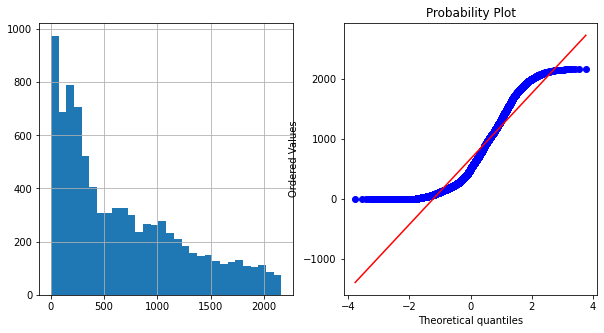

In [38]:
plotvariable(le_data,'Rented Bike Count')

##Observations:

1. The Rented Bike Count target is not normally distributed.

2. We need to make transformations before applying to the model.

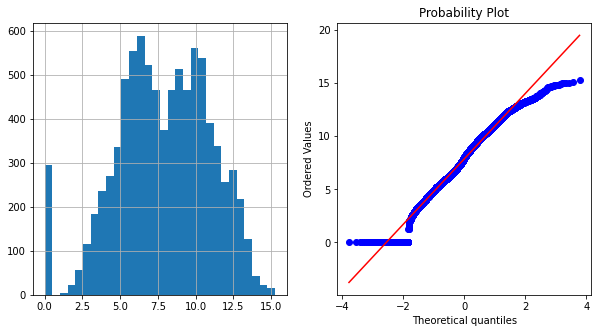

In [39]:
data["RBC_qb"]=np.cbrt(data['Rented Bike Count']) #try cube root technique to convert positive skewed to normal distribution

plotvariable(data,"RBC_qb")

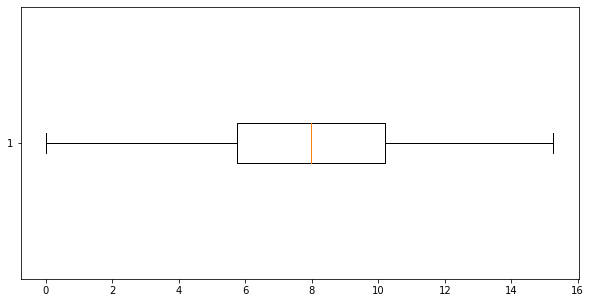

In [40]:
plt.figure(figsize=(10,5))
plt.boxplot(data["RBC_qb"],vert=False)
plt.show()

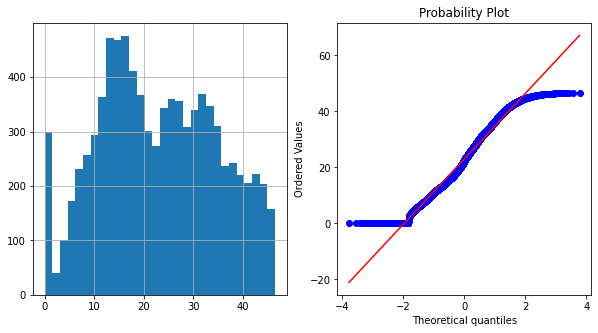

In [41]:
le_data['Rented Bike Count']=np.sqrt(le_data['Rented Bike Count'])

plotvariable(le_data,'Rented Bike Count')

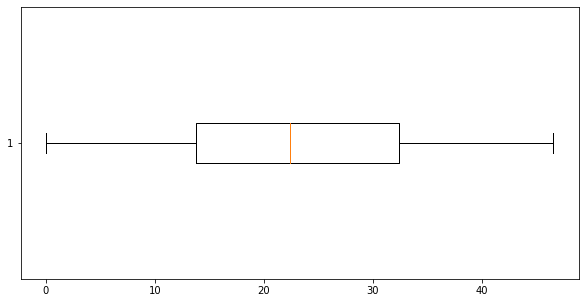

In [42]:
plt.figure(figsize=(10,5))
plt.boxplot(le_data["Rented Bike Count"],vert=False)
plt.show()

##Observations:

1. Now, Rented Bike Count looks like Normal Distributation.

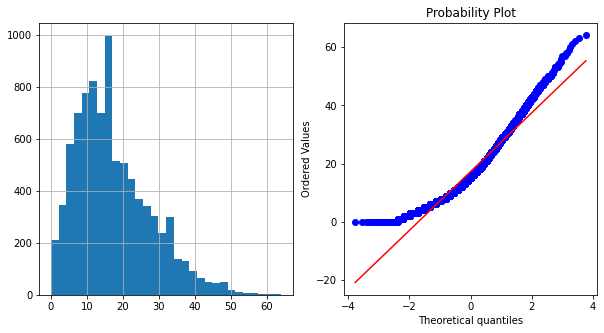

In [43]:
plotvariable(le_data,'Wind speed (m/s)')

##Observations:

1. The feature Wind Speed is right skewed. 

2. There is a need to apply transformations.


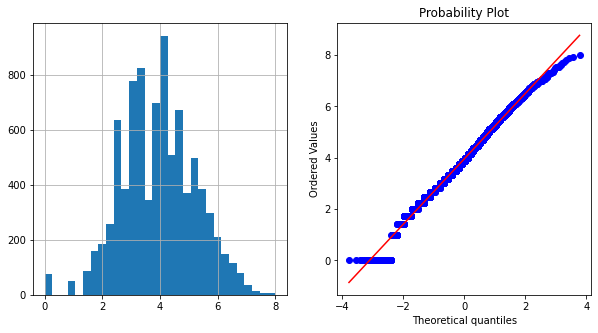

In [44]:
le_data['Wind speed (m/s)'] = np.sqrt(le_data['Wind speed (m/s)'])

plotvariable(le_data, 'Wind speed (m/s)')

##Observations:

1. Now, Wind Speed is Normally Distributed.

##Checking Correlation Of Data

Correlation is a statistical measure that expresses the strength of the relationship between two variables.

The two main types of correlation : positive and negative.

Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends

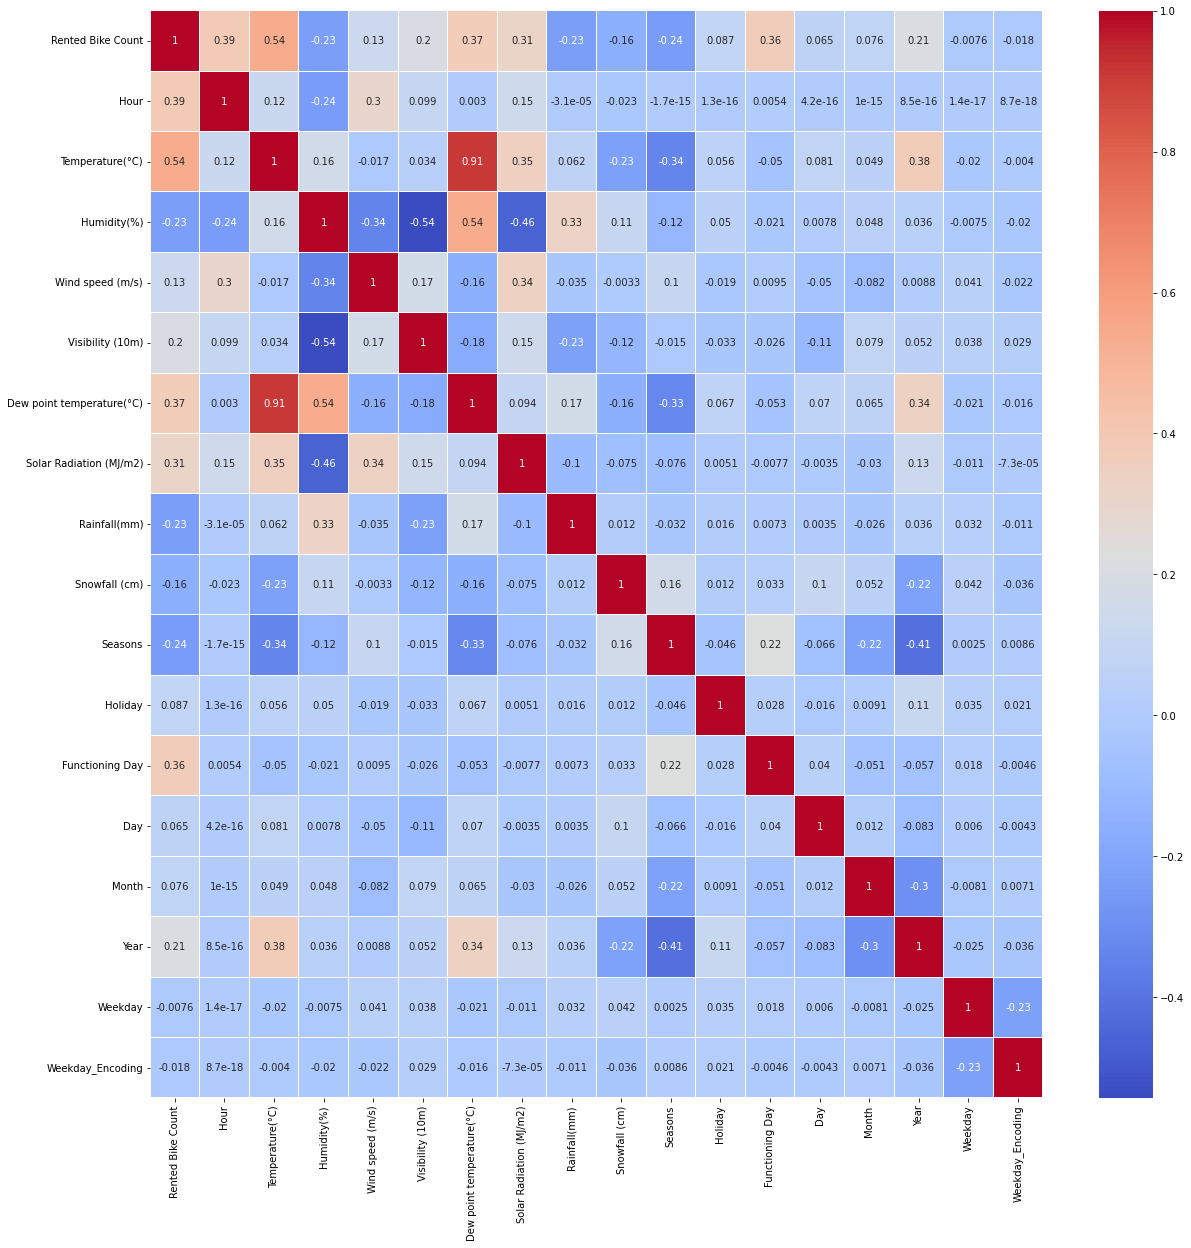

In [45]:
data_corr= le_data.corr()       
plt.figure(figsize=(20,20))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

##Observations:

1. The target variable (Rented Bike Count), the most correlated variables are: Hour, Temperature, Dew point temperature and Functioning Day.

2. The features Temperature and Dew Point Temperature are almost 0.91 correlated.

2. So it can cause the issue of Multicollinearity.

3. Hence, drop the feature Dew Point Temperature.

In [46]:
le_data.drop(columns = ['Dew point temperature(°C)'], inplace=True)

##Create the Input and Target variables.

1. The column Rented Bike Count contains the value we need to predict i.e. it's the Target column.

2. Data from all the other columns (except the first and the last column) can be used as inputs to the model.

In [47]:
X = le_data.drop('Rented Bike Count', axis=1)
y = le_data['Rented Bike Count']